# ***Importing Libraries***

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# ***Importing File***

In [266]:
df = pd.read_csv("wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [268]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Q1. Compute and plot those feature which are related to each other?

# ***Correlational MAtrix with Heatmap***

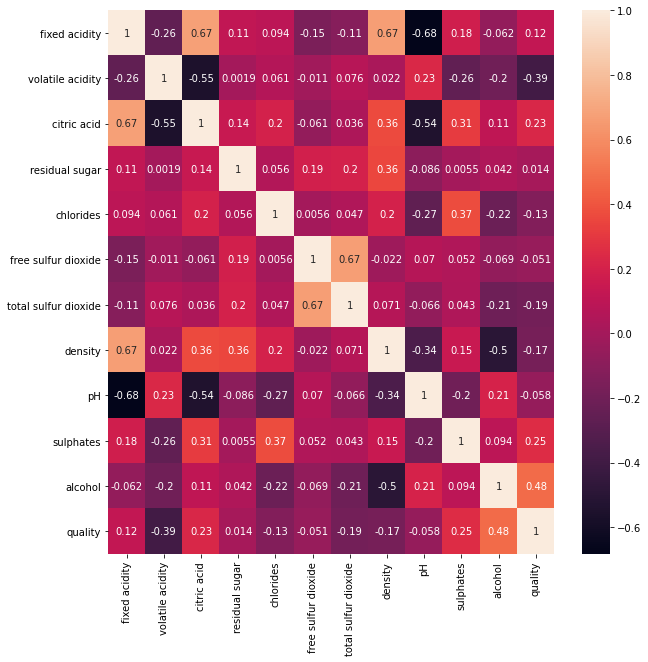

In [4]:
plt.figure(figsize=(10, 10))
p =df.corr()
sns.heatmap(p, annot = True)
plt.show()

Each cell in the grid represents the value of the correlation coefficient between two variables.

The value at position (a, b) represents the correlation coefficient between features at row a and column b. This will be equal to the value at position (b, a)
It is a square matrix – each row represents a variable, and all the columns represent the same variables as rows, hence the number of rows = number of columns.
It is a symmetric matrix – this makes sense because the correlation between a,b will be the same as that between b, a.

All diagonal elements are 1. Since diagonal elements represent the correlation of each variable with itself, it will always be equal to 1.

The axes ticks denote the feature each of them represents.

A large positive value (near to 1.0) indicates a strong positive correlation, i.e., if the value of one of the variables increases, the value of the other variable increases as well.

A large negative value (near to -1.0) indicates a strong negative correlation, i.e., the value of one variable decreases with the other’s increasing and vice-versa.

A value near to 0 (both positive or negative) indicates the absence of any correlation between the two variables, and hence those variables are independent of each other. 

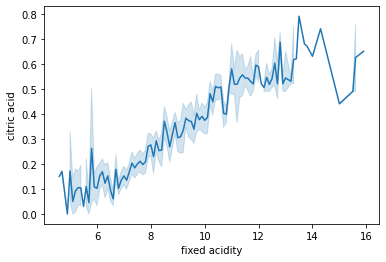

In [270]:
sns.lineplot(x = df['fixed acidity'], y = df['citric acid'])

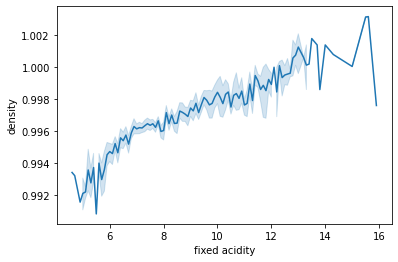

In [271]:
sns.lineplot(x = df['fixed acidity'], y = df['density'])

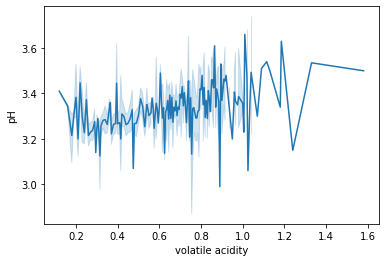

In [272]:
sns.lineplot(x = df['volatile acidity'], y = df['pH'])

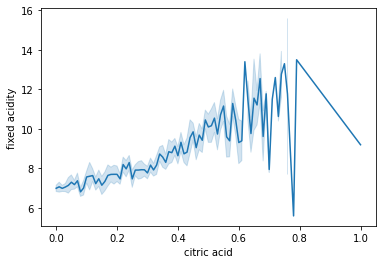

In [273]:
sns.lineplot(x = df['citric acid'], y = df['fixed acidity'])

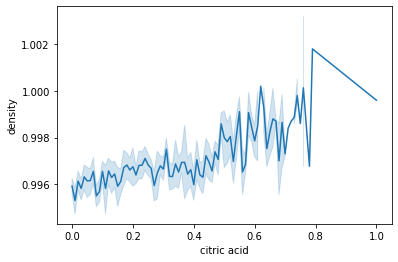

In [274]:
sns.lineplot(x = df['citric acid'], y = df['density'])

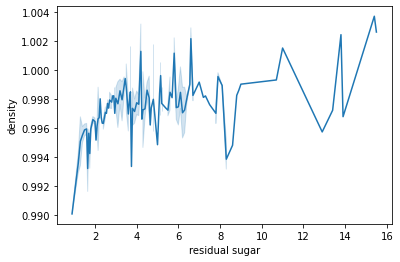

In [275]:
sns.lineplot(x = df['residual sugar'], y = df['density'])

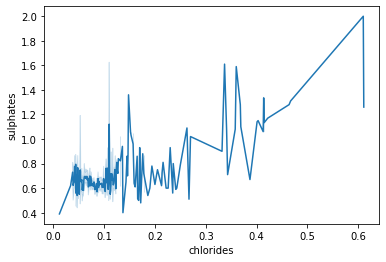

In [276]:
sns.lineplot(x = df['chlorides'], y = df['sulphates'])

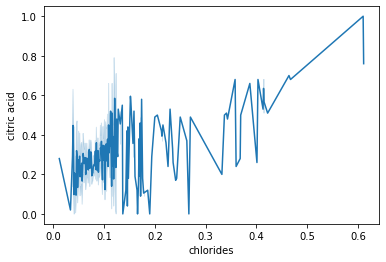

In [277]:
sns.lineplot(x = df['chlorides'], y = df['citric acid'])

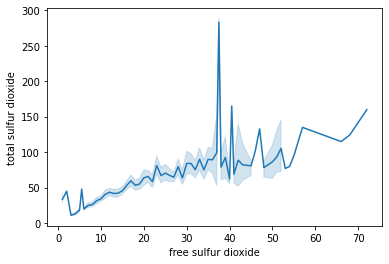

In [278]:
sns.lineplot(x = df['free sulfur dioxide'], y = df['total sulfur dioxide'])

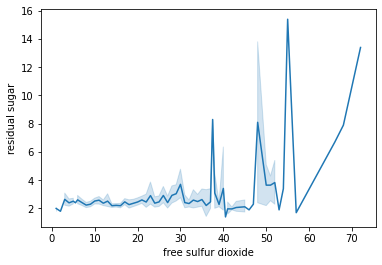

In [281]:
sns.lineplot(x = df['free sulfur dioxide'], y = df['residual sugar'])

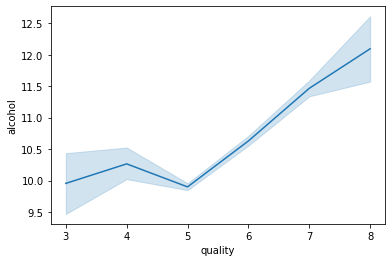

In [283]:
sns.lineplot(x = df['quality'], y = df['alcohol'])

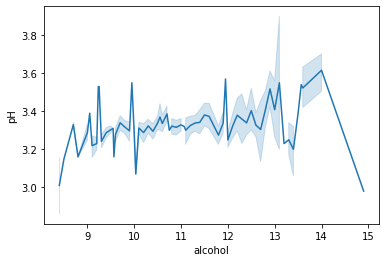

In [284]:
sns.lineplot(x = df['alcohol'], y = df['pH'])

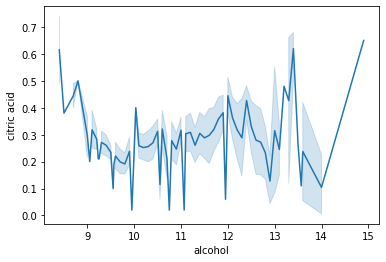

In [287]:
sns.lineplot(x = df['alcohol'], y = df['citric acid'])

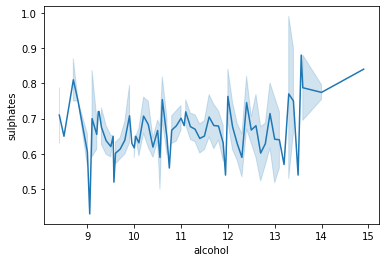

In [288]:
sns.lineplot(x = df['alcohol'], y = df['sulphates'])

Q2. What are the optimum number of principal components in PCA?

PCA is used in practice is the ability to estimate how many components are needed to describe the data. 

There is no such genearlized way for the optimum number of principal components in PCA.It is Case dependent..

Q3. Build a KNN classifier considering optimal number of principal components and value of K and state its score

# ***Applying PCA to get Optimal number of components***

In [243]:
#Importing required libraries
import os
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split 

# Importing data to python 
dataset = pd.read_csv('wine.csv') 

dataset['quality'].value_counts()
dataset.loc[dataset['quality'] > 6.5, 'quality(P)'] = 1  
dataset.loc[dataset['quality'] < 6.5, 'quality(P)'] = 0
del dataset['quality']

dataset['quality'] = dataset['quality(P)']
del dataset['quality(P)']

#Creating empty list so as to save result
Result = []
No_var = []

# Iterating from 1 to number of dependent variables in dataset 
for i in np.arange(1,len(dataset.columns)):
    
    # Subsetting into Depenedent and Independent variables
    X = dataset.iloc[:, 0:-1]
    y = dataset.iloc[:, -1:] 
    
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  
# Feature Scaling

    sc = StandardScaler() 
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    #applying PCA ( here n_components is the no of components we want to have)
    pca = PCA(n_components = i) 
    X_train = pca.fit_transform(X_train) #fit and transform on training data
    X_test = pca.transform(X_test)  #Transforming the test data    

    # Building K-NN classifier Model
    classifier = KNeighborsClassifier(n_neighbors =40, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test) 

    #calculating  R-squared 
    t  = roc_auc_score(y_test,y_pred)
    
    Result.append(t)
    No_var.append(i)
    
    print("Score with n_components {}:".format(i),t)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed

Score with n_components 1: 0.5
Score with n_components 2: 0.571264367816092
Score with n_components 3: 0.6063218390804598
Score with n_components 4: 0.6080459770114943
Score with n_components 5: 0.6080459770114943


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed

Score with n_components 6: 0.6448275862068965
Score with n_components 7: 0.6281609195402299
Score with n_components 8: 0.6431034482758621
Score with n_components 9: 0.6431034482758621
Score with n_components 10: 0.6580459770114943
Score with n_components 11: 0.6729885057471264


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


# **By applying PCA, we get 11 n_components**

# ***Coverting Target Variable into Categorical***

1.   Wines having the “Quality” value > 6.5 are assigned value 1,
2.   Wines having the “Quality” value < 6.5, are assigned value 0
3.   Where 0: Ordinary Quality of wine and 1: High quality of wine


In [244]:
df['quality'].value_counts()
df.loc[df['quality'] > 6.5, 'quality(P)'] = 1  
df.loc[df['quality'] < 6.5, 'quality(P)'] = 0
del df['quality']

In [245]:
df['quality'] = df['quality(P)']
del df['quality(P)']

In [246]:
df['quality'].value_counts()

0.0    1382
1.0     217
Name: quality, dtype: int64

In [247]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# ***Dividing Dataset into X and y***

In [248]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
y

,quality
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1594,0.0
1595,0.0
1596,0.0
1597,0.0


# ***Splitting data into Train and Test***

In [249]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

print(X_train.shape) # 75% of 40
print(X_test.shape)  # 25% of 40
print(y_train.shape) 
print(y_test.shape)

(1199, 11)
(400, 11)
(1199, 1)
(400, 1)


# ***Feature Scaling***

In [80]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ***Fitting K-NN to the Training set***

In [69]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =50, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

# ***Testing***

In [70]:
y_pred = classifier.predict(X_test)

# ***Accuracy and AUC_ROC Score***

In [71]:
from sklearn import metrics

print(metrics.accuracy_score(y_pred,y_test))
print(metrics.roc_auc_score(y_pred,y_test))

0.89
0.7171029869680544


# ***Hyperparamter Tuning to find Optimum Value of K***

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
def param_selection(X, y, nfolds):
    n_neighbors = list(range(20, 100))
    p=[1,2]
    params_grid = dict(n_neighbors=n_neighbors, p=p)# this is dictionary we are creating so as to get the best tuning
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid = params_grid,cv=nfolds)# coming from sklearn.modelselection
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [74]:
param_selection(X_train,y_train,8)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

{'n_neighbors': 91, 'p': 1}

In [75]:
classifier = KNeighborsClassifier(n_neighbors =91, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=91, p=1,
                     weights='uniform')

In [76]:
y_pred = classifier.predict(X_test)

In [77]:
from sklearn import metrics

print(metrics.accuracy_score(y_pred,y_test))
print(metrics.roc_auc_score(y_pred,y_test))

0.9
0.8160785230193971


Q4. Build a SVM Classifier and tune the hyperparameters to get the optimum model.

# ***SVM***

# ***Feature Scaling***

In [250]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ***Fitting SVM to the Training set***

In [251]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# ***Predicting the Test set results***

In [255]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


# ***Accuracy***

In [256]:
from sklearn import metrics


print(metrics.accuracy_score(y_pred,y_test))


0.8875


# ***HyperParamter Tuning***

In [257]:
from sklearn.model_selection import GridSearchCV

In [258]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]# Generally we take the values in this range only
    gammas = [0.001, 0.01, 0.1, 1]
    svc = SVC()
    param_grid = {'C': Cs, 'gamma' : gammas}# this is dictionary we are creating so as to get the best tuning
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)# coming from sklearn.modelselection
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [259]:
svc_param_selection(X_train,y_train,5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 1, 'gamma': 1}

In [260]:
svclassifier = SVC(C=1,kernel='rbf',gamma=1)
svclassifier.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [261]:
pred_y = svclassifier.predict(X_test)

In [262]:
pred_y

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [263]:
y_test

,quality
1109,0.0
1032,0.0
1002,1.0
487,0.0
979,0.0
...,...
489,0.0
362,0.0
526,0.0
442,1.0


In [264]:
from sklearn import metrics

print(metrics.accuracy_score(pred_y,y_test))


0.9225


Q5. Build a Naive Bayes Classifier and comment about its accuracy.

# ***Naive Bayes Classifier***

# ***Checking Multicollinearity by VIF(Variance Inflation Factor)***

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [218]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,fixed acidity,74.452265
1,volatile acidity,17.060026
2,citric acid,9.183495
3,residual sugar,4.662992
4,chlorides,6.554877
5,free sulfur dioxide,6.442682
6,total sulfur dioxide,6.519699
7,density,1479.287209
8,pH,1070.967685
9,sulphates,21.590621


# ***Deleting Columns Having VIF > 10***

In [219]:
del df['fixed acidity']
del df['volatile acidity']
del df['density']
del df['pH']
del df['sulphates']
del df['alcohol']

In [220]:
df

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,quality
0,0.00,1.9,0.076,11.0,34.0,0.0
1,0.00,2.6,0.098,25.0,67.0,0.0
2,0.04,2.3,0.092,15.0,54.0,0.0
3,0.56,1.9,0.075,17.0,60.0,0.0
4,0.00,1.9,0.076,11.0,34.0,0.0
...,...,...,...,...,...,...
1594,0.08,2.0,0.090,32.0,44.0,0.0
1595,0.10,2.2,0.062,39.0,51.0,0.0
1596,0.13,2.3,0.076,29.0,40.0,0.0
1597,0.12,2.0,0.075,32.0,44.0,0.0


# ***Feature Scaling***

In [221]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ***Dividing Data into X and y***

In [222]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
y.value_counts()

quality
0.0        1382
1.0         217
dtype: int64

# ***Splittind Data into Train and Test***

In [223]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)



# ***Importing Naives Bayes Algo***

In [224]:
from sklearn.naive_bayes import GaussianNB

# ***Fitting NAives Bayes to Train set***

In [225]:
model = GaussianNB()

model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

# ***Testing***

In [226]:
y_pred = model.predict(X_test)

# ***Accuracy and Auc_Roc Score***

In [227]:
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix

print(metrics.accuracy_score(y_pred,y_test))
print(metrics.roc_auc_score(y_pred,y_test))

0.885
0.6758588455246552


Q6. Compare all of the models and justify your choice about the optimum model.

By making differnt models like KNN, SVM and Naives Bayes on wine dataset.

1.   KNN : 
*   Accuracy-- 0.90

2.   SVM : 
*   Accuracy--0.9225

3.   Naives Bayes : 
*   Accuracy-- 0.885

I will choose SVM model because its have accuracy greater then all the other models compared.

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:
     
     Accuracy = Number of correct Predictions / total number of predicitions

For binary classification, accuracy can also be calculated in terms of positives and negatives as follows:

    Accuracy = TP+TN / TP+TN+FP+FN

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.




